In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Upload dataset

In [2]:
df_train=pd.read_csv('loan_train.csv')
df_test=pd.read_csv('loan_test.csv')
df_test.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1001205,1227186,4200,4200,4200.0,36 months,6.62%,128.96,A,A2,"PPG Industries, Inc.",6 years,RENT,69000.0,Not Verified,11-Nov,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,car,Loan to buy 2nd alt vehicle,152xx,PA,11.08,0,1-Oct,0,NaN,NaN,10,0,4544,11.60%,15,f,0.0,0.0,4642.374867,4642.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,850106,1061893,1325,1325,1325.0,36 months,13.49%,44.96,C,C2,PPI Technology Services,< 1 year,RENT,24000.0,Source Verified,11-Aug,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 08/12/11 > I am trying to ...,moving,Relocation,705xx,LA,3.80,0,Sep-00,0,24.0,NaN,3,0,2158,11.90%,3,f,0.0,0.0,1476.640000,1476.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,444243,541365,10000,10000,9975.0,36 months,8.94%,317.72,A,A5,PPL Corporation,4 years,MORTGAGE,75000.0,Not Verified,9-Sep,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,I'm tired of paying credit card companies! I'm...,debt_consolidation,Getting rid of credit card debt,181xx,PA,12.64,0,Apr-95,1,NaN,NaN,10,0,36161,46.40%,45,f,0.0,0.0,10287.347790,10261.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,741007,938805,6000,6000,6000.0,60 months,16.49%,147.48,D,D3,ppl eu,10+ years,RENT,60000.0,Source Verified,11-May,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,yay,187xx,PA,13.06,0,1-Mar,0,75.0,NaN,20,0,13961,60.20%,24,f,0.0,0.0,8848.343924,8848.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,572468,736352,25000,25000,25000.0,36 months,15.21%,869.21,D,D2,PPMM,4 years,RENT,135000.0,Source Verified,10-Sep,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt Consolidation Loan,950xx,CA,15.49,0,Jul-98,2,NaN,NaN,20,0,21090,55.70%,44,f,0.0,0.0,31293.587380,31293.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Process label column

In [3]:
def assign_label(x):
  if x=="Fully Paid":
    return 1
  else:
    return -1 

In [4]:
df_train=df_train[df_train['loan_status']!='Current']
df_test=df_test[df_test['loan_status']!='Current']
df_train['loan_status']=df_train['loan_status'].apply(lambda x:assign_label(x))
df_test['loan_status']=df_test['loan_status'].apply(lambda x:assign_label(x))

Drop columns or rows which contains all NAN or null values

In [5]:
df_train=df_train.dropna(how='all',axis=1)
df_train=df_train.dropna(how='all',axis=0)
print(df_train)

df_test=df_test.dropna(how='all',axis=1)
df_test=df_test.dropna(how='all',axis=0)
print(df_test)

           id  member_id  ...  pub_rec_bankruptcies  tax_liens
0      573354     737474  ...                   0.0        0.0
1      476321     603324  ...                   0.0        0.0
2      451484     556265  ...                   0.0        0.0
4      800018    1005270  ...                   0.0        0.0
5      471391     595223  ...                   0.0        0.0
...       ...        ...  ...                   ...        ...
24994  450579     554340  ...                   0.0        0.0
24995  788033     991661  ...                   0.0        0.0
24996  568459     731299  ...                   0.0        0.0
24997  397594     428786  ...                   1.0        0.0
24998  660367     844601  ...                   0.0        0.0

[24301 rows x 56 columns]
            id  member_id  ...  pub_rec_bankruptcies  tax_liens
0      1001205    1227186  ...                   0.0        0.0
1       850106    1061893  ...                   0.0        0.0
2       444243     541365

Remove columns that have 
1.   Same values for each sample.
2.  Different value 

In [6]:
drop_column_indices=list()
i=0
c=df_train.nunique()
column_list=list(df_train)
for ser in c:
  if ser == len(df_train) or ser == 0 or ser == 1:
    df_train.drop([column_list[i]],inplace=True,axis=1)
    df_test.drop([column_list[i]],inplace=True,axis=1)
  i=i+1
print(df_train)  
print(df_test)  


       loan_amnt  funded_amnt  ...  last_credit_pull_d pub_rec_bankruptcies
0          10000        10000  ...              11-Jul                  0.0
1          15000        15000  ...              10-Feb                  0.0
2           2000         2000  ...              11-Dec                  0.0
4          14000        14000  ...              16-May                  0.0
5          12000        12000  ...              10-May                  0.0
...          ...          ...  ...                 ...                  ...
24994       5500         5500  ...              12-Jun                  0.0
24995      11450        11450  ...              16-May                  0.0
24996      24000        24000  ...              16-May                  0.0
24997      14000        14000  ...              15-Jun                  1.0
24998      13400        13400  ...              14-Feb                  0.0

[24301 rows x 42 columns]
       loan_amnt  funded_amnt  ...  last_credit_pull_d pub_re

"Dropping columns with low information and majority NAN columns contains only 0.37% or 0.42%
0.008% of data other values are NAN hence dropping these columns"

In [7]:
c=df_train['mths_since_last_delinq'].nunique()
print(c/len(df_train))
c=df_train['mths_since_last_record'].nunique()
print(c/len(df_train))
df_train.drop(['mths_since_last_delinq','mths_since_last_record'],inplace=True,axis=1)
df_test.drop(['mths_since_last_delinq','mths_since_last_record'],inplace=True,axis=1)
print(df_train)
print(df_test)

0.0037035512941854245
0.004279659273280935
       loan_amnt  funded_amnt  ...  last_credit_pull_d pub_rec_bankruptcies
0          10000        10000  ...              11-Jul                  0.0
1          15000        15000  ...              10-Feb                  0.0
2           2000         2000  ...              11-Dec                  0.0
4          14000        14000  ...              16-May                  0.0
5          12000        12000  ...              10-May                  0.0
...          ...          ...  ...                 ...                  ...
24994       5500         5500  ...              12-Jun                  0.0
24995      11450        11450  ...              16-May                  0.0
24996      24000        24000  ...              16-May                  0.0
24997      14000        14000  ...              15-Jun                  1.0
24998      13400        13400  ...              14-Feb                  0.0

[24301 rows x 40 columns]
       loan_amnt  

In [8]:
'''Remove emp_title,desc,title as it contains text that can be dropped'''
'''Removing grade and zip_code and keeping addr_state sub_grade instead'''
'''dropping date columns'''

df_train.drop('emp_title',inplace=True,axis=1)
df_train.drop('desc',inplace=True,axis=1)
df_train.drop('title',inplace=True,axis=1)
df_train.drop('grade',inplace=True,axis=1)
df_train.drop('zip_code',inplace=True,axis=1)
df_train.drop('last_pymnt_d',inplace=True,axis=1)
df_train.drop('last_credit_pull_d',inplace=True,axis=1)
df_train.drop('issue_d',inplace=True,axis=1)


df_test.drop('emp_title',inplace=True,axis=1)
df_test.drop('desc',inplace=True,axis=1)
df_test.drop('title',inplace=True,axis=1)
df_test.drop('grade',inplace=True,axis=1)
df_test.drop('zip_code',inplace=True,axis=1)
df_test.drop('last_pymnt_d',inplace=True,axis=1)
df_test.drop('last_credit_pull_d',inplace=True,axis=1)
df_test.drop('issue_d',inplace=True,axis=1)

print(df_train)
print(df_test)

       loan_amnt  funded_amnt  ...  last_pymnt_amnt pub_rec_bankruptcies
0          10000        10000  ...           311.11                  0.0
1          15000        15000  ...         15114.03                  0.0
2           2000         2000  ...           101.78                  0.0
4          14000        14000  ...          3943.27                  0.0
5          12000        12000  ...         11204.30                  0.0
...          ...          ...  ...              ...                  ...
24994       5500         5500  ...          1122.20                  0.0
24995      11450        11450  ...           382.90                  0.0
24996      24000        24000  ...         16500.39                  0.0
24997      14000        14000  ...          3857.88                  1.0
24998      13400        13400  ...           475.29                  0.0

[24301 rows x 32 columns]
       loan_amnt  funded_amnt  ...  last_pymnt_amnt pub_rec_bankruptcies
0           4200        

Detect missing values

In [9]:
columns=df_train.columns[df_train.isnull().any()]
print(columns)

columns=df_test.columns[df_test.isnull().any()]
print(columns)

skewness=df_train.skew(axis=1,skipna=True)
symmetric_columns=list()
for i in range(len(columns)):
   if skewness.array[df_train.columns.get_loc(columns[i])] ==0:
     symmetric_columns.append(columns[i])

Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')
Index(['emp_length', 'revol_util', 'pub_rec_bankruptcies'], dtype='object')


pub_rec_bankruptcies contains three values i.e. 0,1,2 as this can be decisive attribute we will fill the values with a number other than 0,1,2 lets keep it -1

In [10]:
df_train['pub_rec_bankruptcies'].fillna(value=123,inplace=True)
df_test['pub_rec_bankruptcies'].fillna(value=123,inplace=True)
columns=df_train.columns[df_train.isnull().any()]
print(columns)
columns=df_test.columns[df_test.isnull().any()]
print(columns)

Index(['emp_length', 'revol_util'], dtype='object')
Index(['emp_length', 'revol_util'], dtype='object')


For emp_length field for the values that are unknown i.e. NAN we can feed the value 0 

In [11]:
from sklearn.preprocessing import LabelEncoder
df_train['emp_length'] = LabelEncoder().fit_transform(df_train['emp_length'].astype(str))
df_test['emp_length'] = LabelEncoder().fit_transform(df_test['emp_length'].astype(str))
values=np.unique(df_train['emp_length'])
print(values)
df_train['emp_length'].fillna(value='0',inplace=True)
df_test['emp_length'].fillna(value='0',inplace=True)
columns=df_train.columns[df_train.isnull().any()]
print(columns)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
Index(['revol_util'], dtype='object')


We know that all the columns with missing values are not symmetric hence instead of replacing it by mean median of that column is chosen

In [12]:
df_train['revol_util']=df_train['revol_util'].str.replace("%","").astype(float)
df_train['int_rate']=df_train['int_rate'].str.replace("%","").astype(float)

df_test['revol_util']=df_test['revol_util'].str.replace("%","").astype(float)
df_test['int_rate']=df_test['int_rate'].str.replace("%","").astype(float)

print(df_train['revol_util'])

df_train['revol_util'].fillna(value=df_train['revol_util'].median(),inplace=True)
df_test['revol_util'].fillna(value=df_test['revol_util'].median(),inplace=True)

columns=df_train.columns[df_train.isnull().any()]
print(columns)

columns=df_test.columns[df_test.isnull().any()]
print(columns)

0         1.2
1        14.0
2        34.4
4         9.4
5         2.8
         ... 
24994    58.2
24995    34.0
24996    77.2
24997    95.0
24998    41.8
Name: revol_util, Length: 24301, dtype: float64
Index([], dtype='object')
Index([], dtype='object')


Create test train label splits

In [13]:
X=df_train
X_train=X.drop('loan_status',axis=1)
y_train=df_train['loan_status']
X_train.head(5)

X=df_test
X_test=X.drop('loan_status',axis=1)
y_test=df_test['loan_status']
print(X_train)
print(X_test)

print(y_train)
print(y_test)

       loan_amnt  funded_amnt  ...  last_pymnt_amnt pub_rec_bankruptcies
0          10000        10000  ...           311.11                  0.0
1          15000        15000  ...         15114.03                  0.0
2           2000         2000  ...           101.78                  0.0
4          14000        14000  ...          3943.27                  0.0
5          12000        12000  ...         11204.30                  0.0
...          ...          ...  ...              ...                  ...
24994       5500         5500  ...          1122.20                  0.0
24995      11450        11450  ...           382.90                  0.0
24996      24000        24000  ...         16500.39                  0.0
24997      14000        14000  ...          3857.88                  1.0
24998      13400        13400  ...           475.29                  0.0

[24301 rows x 31 columns]
       loan_amnt  funded_amnt  ...  last_pymnt_amnt pub_rec_bankruptcies
0           4200        

Create labels for categorical data and use label encoders for encoding

In [14]:
def assign_numericvalue(x):
  if x=="MORTGAGE":
    return 1
  elif x =="OWN":
    return 2
  elif x=="RENT":
    return 3
  elif x=="OTHER":
    return 4
  else:
    return 0      

In [15]:
val=np.unique(X_train['home_ownership'])
print(val)

val=np.unique(X_test['home_ownership'])
print(val)

X_train['home_ownership']=X_train['home_ownership'].apply(lambda x:assign_numericvalue(x))
X_test['home_ownership']=X_test['home_ownership'].apply(lambda x:assign_numericvalue(x))
X_train.head(5)

['MORTGAGE' 'OTHER' 'OWN' 'RENT']
['MORTGAGE' 'NONE' 'OTHER' 'OWN' 'RENT']


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,10000,10000,9950.0,36 months,7.51,311.11,A4,1,3,30000.0,Source Verified,home_improvement,NJ,5.00,0,1-Feb,3,19,0,1450,1.2,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11,0.0
1,15000,15000,14800.0,36 months,8.94,476.58,A5,0,3,147000.0,Not Verified,other,GA,3.47,0,Feb-97,0,6,0,4910,14.0,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03,0.0
2,2000,2000,2000.0,36 months,13.57,67.94,C3,4,2,36000.0,Not Verified,major_purchase,GA,7.83,0,Mar-00,0,8,0,1790,34.4,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78,0.0
4,14000,14000,14000.0,60 months,17.49,351.64,D5,5,1,50000.0,Not Verified,debt_consolidation,FL,21.24,1,4-Jun,1,9,1,553,9.4,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27,0.0
5,12000,12000,11900.0,36 months,8.94,381.26,A5,7,1,294000.0,Not Verified,other,CA,0.50,0,Aug-93,0,11,0,5306,2.8,21,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,11204.30,0.0


In [16]:
X_train['term'] = X_train['term'].apply(lambda x:x.split()[0])
X_train['term'] = LabelEncoder().fit_transform(X_train['term'].astype(int))

X_test['term'] = X_test['term'].apply(lambda x:x.split()[0])
X_test['term'] = LabelEncoder().fit_transform(X_test['term'].astype(int))
print(X_train['term'])

0        0
1        0
2        0
4        1
5        0
        ..
24994    0
24995    0
24996    1
24997    0
24998    0
Name: term, Length: 24301, dtype: int64


In [17]:
grade= {'A':10.0, 'B':9.0, 'C':8.0, 'D':7.0, 'E':6.0,'F':5.0,'G':4.0}
sub_grade= {'A1':"10.0",'A2':"9.8",'A3':"9.6",'A4':"9.4",'A5':"9.2", 'B1':"9.0",'B2':"8.8",'B3':"8.6",'B4':"8.4",'B5':"8.2", 'C1':"8.0",'C2':"7.8",'C3':"7.6",'C4':"7.4",'C5':"7.2",
            'D1':"7.0",'D2':"6.8",'D3':"6.6",'D4':"6.4",'D5':"6.2", 'E1':"6.0",'E2':"5.8",'E3':"5.6",'E4':"5.4",'E5':"5.2",'F1':"5.0",'F2':"4.8",'F3':"4.6",'F4':"4.4",'F5':"4.2",
            'G1':"4.0",'G2':"3.8",'G3':"3.6",'G4':"3.4",'G5':"3.2"}

print(X_train['sub_grade'])
#X_train['grade']=X_train['grade'].apply(lambda x:grade.get(x))
X_train['sub_grade']=X_train['sub_grade'].apply(lambda x:sub_grade.get(x))
X_test['sub_grade']=X_test['sub_grade'].apply(lambda x:sub_grade.get(x))

'''X_train['sub_grade'] = LabelEncoder().fit_transform(X_train['sub_grade'].astype(float))
X_test['sub_grade'] = LabelEncoder().fit_transform(X_test['sub_grade'].astype(float))'''
print(X_train['sub_grade'])
X_train.head(5)

0        A4
1        A5
2        C3
4        D5
5        A5
         ..
24994    D2
24995    A5
24996    G2
24997    F2
24998    C2
Name: sub_grade, Length: 24301, dtype: object
0        9.4
1        9.2
2        7.6
4        6.2
5        9.2
        ... 
24994    6.8
24995    9.2
24996    3.8
24997    4.8
24998    7.8
Name: sub_grade, Length: 24301, dtype: object


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,10000,10000,9950.0,0,7.51,311.11,9.4,1,3,30000.0,Source Verified,home_improvement,NJ,5.00,0,1-Feb,3,19,0,1450,1.2,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11,0.0
1,15000,15000,14800.0,0,8.94,476.58,9.2,0,3,147000.0,Not Verified,other,GA,3.47,0,Feb-97,0,6,0,4910,14.0,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03,0.0
2,2000,2000,2000.0,0,13.57,67.94,7.6,4,2,36000.0,Not Verified,major_purchase,GA,7.83,0,Mar-00,0,8,0,1790,34.4,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78,0.0
4,14000,14000,14000.0,1,17.49,351.64,6.2,5,1,50000.0,Not Verified,debt_consolidation,FL,21.24,1,4-Jun,1,9,1,553,9.4,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27,0.0
5,12000,12000,11900.0,0,8.94,381.26,9.2,7,1,294000.0,Not Verified,other,CA,0.50,0,Aug-93,0,11,0,5306,2.8,21,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,11204.30,0.0


In [18]:
def assign_numericvaluestat(x):
  if x=="Not Verified":
    return 1
  elif x =="Source Verified":
    return 2
  elif x=="Verified":
    return 3

In [19]:
def LabelEncode(X):
        columns = list(X.select_dtypes(include=['category','object','datetime64[ns]']))
        #le = LabelEncoder()
        for column in columns:
            try:
                X[column] = LabelEncoder().fit_transform(X[column])
            except:
                print('Error encoding '+column)
        return X

In [20]:
X_train['verification_status']=X_train['verification_status'].apply(lambda x:assign_numericvaluestat(x))
X_train=LabelEncode(X_train)
X_test=LabelEncode(X_test)

print(X_train)
X_train.head(5)

       loan_amnt  funded_amnt  ...  last_pymnt_amnt  pub_rec_bankruptcies
0          10000        10000  ...           311.11                   0.0
1          15000        15000  ...         15114.03                   0.0
2           2000         2000  ...           101.78                   0.0
4          14000        14000  ...          3943.27                   0.0
5          12000        12000  ...         11204.30                   0.0
...          ...          ...  ...              ...                   ...
24994       5500         5500  ...          1122.20                   0.0
24995      11450        11450  ...           382.90                   0.0
24996      24000        24000  ...         16500.39                   0.0
24997      14000        14000  ...          3857.88                   1.0
24998      13400        13400  ...           475.29                   0.0

[24301 rows x 31 columns]


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,10000,10000,9950.0,0,7.51,311.11,32,1,3,30000.0,2,4,30,5.00,0,3,3,19,0,1450,1.2,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11,0.0
1,15000,15000,14800.0,0,8.94,476.58,31,0,3,147000.0,1,9,10,3.47,0,224,0,6,0,4910,14.0,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03,0.0
2,2000,2000,2000.0,0,13.57,67.94,23,4,2,36000.0,1,6,10,7.83,0,322,0,8,0,1790,34.4,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78,0.0
4,14000,14000,14000.0,1,17.49,351.64,16,5,1,50000.0,1,2,9,21.24,1,42,1,9,1,553,9.4,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27,0.0
5,12000,12000,11900.0,0,8.94,381.26,31,7,1,294000.0,1,9,4,0.50,0,151,0,11,0,5306,2.8,21,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,11204.30,0.0


In [21]:
from sklearn.preprocessing import LabelBinarizer
X_train.home_ownership = LabelBinarizer().fit_transform(X_train.home_ownership)
X_train.verification_status = LabelBinarizer().fit_transform(X_train.verification_status)
X_train.purpose = LabelBinarizer().fit_transform(X_train.purpose)
X_train.addr_state = LabelBinarizer().fit_transform(X_train.addr_state)
X_train.sub_grade = LabelBinarizer().fit_transform(X_train.sub_grade)

X_test.home_ownership = LabelBinarizer().fit_transform(X_test.home_ownership)
X_test.verification_status = LabelBinarizer().fit_transform(X_test.verification_status)
X_test.purpose = LabelBinarizer().fit_transform(X_test.purpose)
X_test.addr_state = LabelBinarizer().fit_transform(X_test.addr_state)
X_test.sub_grade = LabelBinarizer().fit_transform(X_test.sub_grade)
print(X_train)

       loan_amnt  funded_amnt  ...  last_pymnt_amnt  pub_rec_bankruptcies
0          10000        10000  ...           311.11                   0.0
1          15000        15000  ...         15114.03                   0.0
2           2000         2000  ...           101.78                   0.0
4          14000        14000  ...          3943.27                   0.0
5          12000        12000  ...         11204.30                   0.0
...          ...          ...  ...              ...                   ...
24994       5500         5500  ...          1122.20                   0.0
24995      11450        11450  ...           382.90                   0.0
24996      24000        24000  ...         16500.39                   0.0
24997      14000        14000  ...          3857.88                   1.0
24998      13400        13400  ...           475.29                   0.0

[24301 rows x 31 columns]


Feature selection using SelectKBest and chi2 score

In [22]:
 from sklearn.datasets import load_digits
 from sklearn.feature_selection import SelectKBest, f_classif,mutual_info_classif,chi2
 X_subset=X_train.select_dtypes([np.number])
 selector = SelectKBest(chi2, k='all')
 selector.fit(X_subset, y_train)
 scores=selector.scores_
 print(scores)
 for i in range(len(scores)):
    if scores[i]<=10:   
      X_train.drop(X_subset.columns.values[i],inplace=True,axis=1)
      X_test.drop(X_subset.columns.values[i],inplace=True,axis=1)
  
print(X_train) 
print(X_test) 
X_train.head(5)

[3.99919761e+05 3.50382281e+05 1.67902374e+05 5.21576815e+02
 1.22491680e+03 2.32452360e+03 8.20995875e+01 3.32795781e+00
 7.81748297e+00 2.74505429e+06 2.28411173e+01 8.09582513e+00
 2.55305866e+00 1.71860978e+02 7.98228811e+00 5.10259588e+02
 1.80790119e+02 2.45322988e-02 6.47068401e+01 1.75433251e+04
 4.04741509e+03 4.26201145e+01 8.54871810e+06 8.53722405e+06
 1.35862780e+07 1.23978979e+04 2.83096553e+04 1.45940813e+07
 1.79982154e+06 8.75066175e+06 5.36118680e+02]
       loan_amnt  funded_amnt  ...  last_pymnt_amnt  pub_rec_bankruptcies
0          10000        10000  ...           311.11                   0.0
1          15000        15000  ...         15114.03                   0.0
2           2000         2000  ...           101.78                   0.0
4          14000        14000  ...          3943.27                   0.0
5          12000        12000  ...         11204.30                   0.0
...          ...          ...  ...              ...                   ...
24994   

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,dti,earliest_cr_line,inq_last_6mths,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,10000,10000,9950.0,0,7.51,311.11,0,30000.0,0,5.00,3,3,0,1450,1.2,48,2247.210000,2235.98,1509.91,350.87,0.0,386.43,3.96,311.11,0.0
1,15000,15000,14800.0,0,8.94,476.58,0,147000.0,1,3.47,224,0,0,4910,14.0,17,15112.760000,14911.26,15000.00,112.76,0.0,0.00,0.00,15114.03,0.0
2,2000,2000,2000.0,0,13.57,67.94,0,36000.0,1,7.83,322,0,0,1790,34.4,10,2354.966827,2354.97,2000.00,354.97,0.0,0.00,0.00,101.78,0.0
4,14000,14000,14000.0,1,17.49,351.64,0,50000.0,1,21.24,42,1,1,553,9.4,27,20804.230020,20804.23,14000.00,6804.23,0.0,0.00,0.00,3943.27,0.0
5,12000,12000,11900.0,0,8.94,381.26,0,294000.0,1,0.50,151,0,0,5306,2.8,21,12344.811770,12241.94,12000.00,344.81,0.0,0.00,0.00,11204.30,0.0


GradientBoostingClassifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=1, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred))      


Precision
0.9653843458762525
Recall
0.9996372079524016
Accuracy
0.9650462314373774


Changing hyper parameter

In [24]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred))    

Precision
0.9967070692916696
Recall
0.9997891629770188
Accuracy
0.9964976183804988


In [25]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
         max_depth=3, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred))    

Precision
0.9943053993250843
Recall
0.9963367382881296
Accuracy
0.9906836648921267


Increasing depth reduced the accuracy

In [26]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=2.0,
         max_depth=2, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred))    

Precision
0.9951262738147985
Recall
0.9483462350457424
Accuracy
0.9439618940879798


Increasing learning rate decreased accuracy as it might have missed some local minima

In [27]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
         max_depth=3, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred)) 

Precision
0.9960759582369841
Recall
0.999648382559775
Accuracy
0.9957270944242085


In [28]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
         max_depth=4, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred)) 

Precision
0.9968465311843028
Recall
0.9995783852153749
Accuracy
0.9964275707481087


Same accuracy as learning_rate=1.0 max_depth=2 

In [29]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=0.4,
         max_depth=4, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred)) 

Precision
0.9974073295494359
Recall
0.9996488517452068
Accuracy
0.9970579994396189


learning_rate=0.4 max_depth=4 gives accuracy 0.997 max till now

In [30]:
classifier2=GradientBoostingClassifier(n_estimators=100, learning_rate=0.4,
         max_depth=5, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred)) 

Precision
0.9978274581260075
Recall
0.9995085995085995
Accuracy
0.997338189969179


Learning at one more depth than earlier increases the accuracy from 0.99705 to 0.99733

As we can see the accuracy depends on combination of learning_rate, max_depth and n_estimators

keeping learning_rate=0.4,max_depth =5 and changing n_estimators

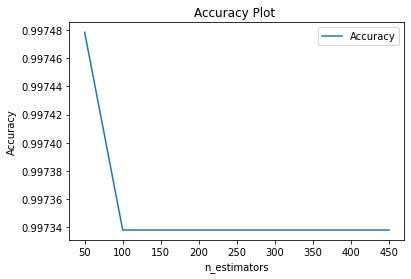

In [31]:
accuracy=list()
for i in range(9):
   classifier2=GradientBoostingClassifier(n_estimators=50+i*50, learning_rate=0.4,
         max_depth=5, random_state=0).fit(X_train, y_train)
   y_pred = classifier2.predict(X_test)
   accuracy.append(accuracy_score(y_test, y_pred))
y1=list()
for i in range(len(accuracy)):
   y1.append(50+i*50)
plt.plot(y1, accuracy, label="Accuracy")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot ')
plt.legend()
plt.show()   


As we can see from the graph accuracy increases for n_estimators=50 , learning_rate=0.4,max_depth=5,random_state=0 hence substituting for final model

In [32]:
classifier2=GradientBoostingClassifier(n_estimators=50, learning_rate=0.4,
         max_depth=5, random_state=0).fit(X_train, y_train)
y_pred = classifier2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred)) 

Precision
0.9980375665825624
Recall
0.9994385176866929
Accuracy
0.9974782852339591


Decision tree classifier 

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
true_pos = np.sum(np.diag(cm))
false_pos=cm[0,1]
false_neg= cm[1,0]
precision = true_pos/(true_pos+false_pos)
recall =true_pos/(true_pos+false_neg)
print("Precision")
print(precision)
print("Recall")
print(recall)
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Precision
0.9982469672533483
Recall
0.998947442284752
Accuracy
0.997198094704399
